In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
data=pd.read_csv("Regression_dataset_Batch_2.csv")

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0


In [4]:
data.shape

(205, 26)

In [5]:
t=data.dtypes

In [6]:
t

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg             float64
highwaympg          float64
price               float64
dtype: object

In [7]:
data.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           5
carlength           0
carwidth            3
carheight           3
curbweight          1
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           4
stroke              1
compressionratio    2
horsepower          0
peakrpm             0
citympg             3
highwaympg          2
price               0
dtype: int64

In [9]:
mean=data.mean(numeric_only=True)


In [10]:
mean

car_ID                103.000000
symboling               0.834146
wheelbase              98.816500
carlength             174.049268
carwidth               65.928218
carheight              53.731683
curbweight           2554.808824
enginesize            126.907317
boreratio               3.330100
stroke                  3.254412
compressionratio       10.155271
horsepower            104.117073
peakrpm              5125.121951
citympg                25.277228
highwaympg             30.822660
price               13276.710571
dtype: float64

In [11]:
df=data.fillna(mean)

In [12]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.000000,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.000000,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,25.277228,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.000000,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.000000,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.000000,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.000000,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.000000,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.000000,27.0,22470.0


In [13]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Plot the following Plots

1)Bar Graph

<Axes: xlabel='fueltype', ylabel='price'>

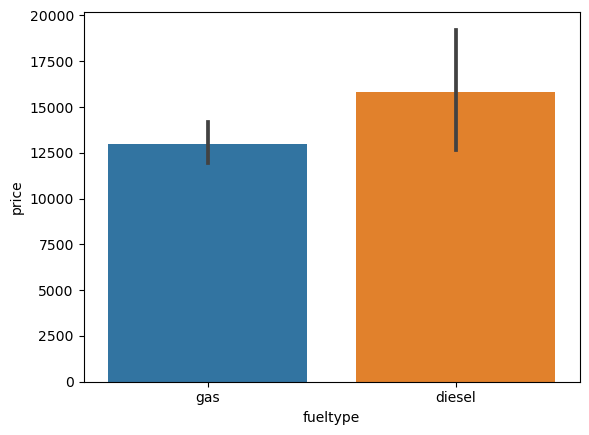

In [14]:
sn.barplot(data=df,x='fueltype',y='price')

2)Scatter plot 

<Axes: xlabel='carlength', ylabel='price'>

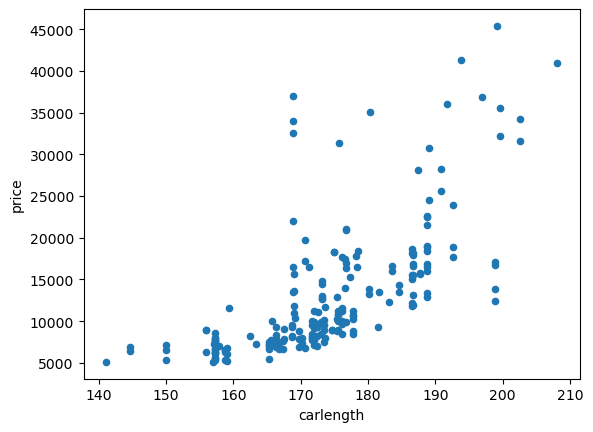

In [15]:
df.plot.scatter(x='carlength',y='price')

3)Histogram

<Axes: ylabel='Frequency'>

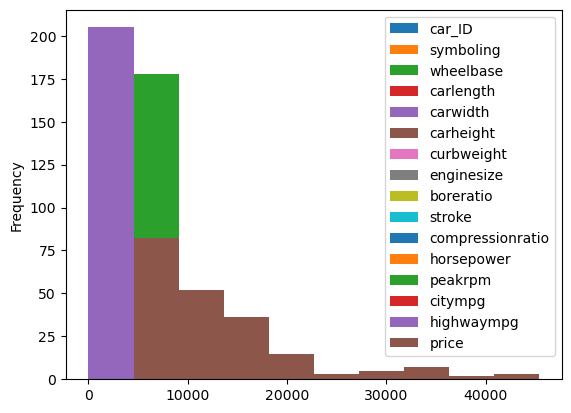

In [16]:
df.plot.hist()

4)Pie chart

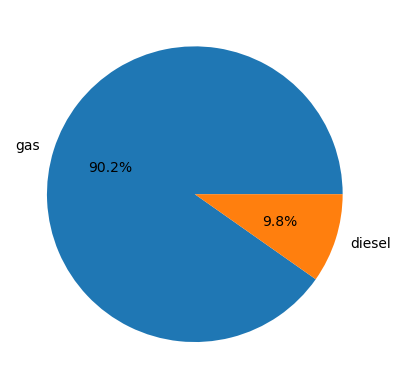

In [17]:
fuel_types =df.fueltype.value_counts()
labels = fuel_types.index.tolist()
values = fuel_types.tolist()
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

5)Box plot

<Axes: >

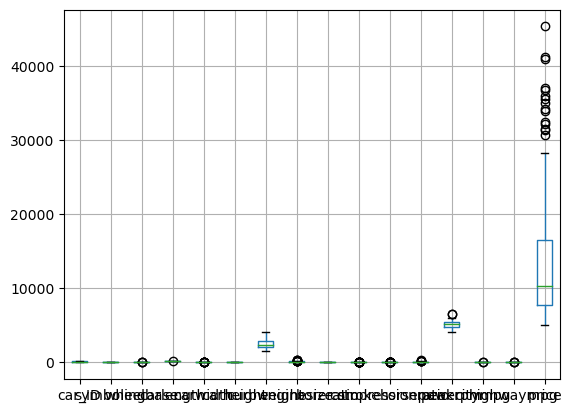

In [18]:
df.boxplot()

In [19]:
# sns.boxplot(df.price)

6)Distribution plot

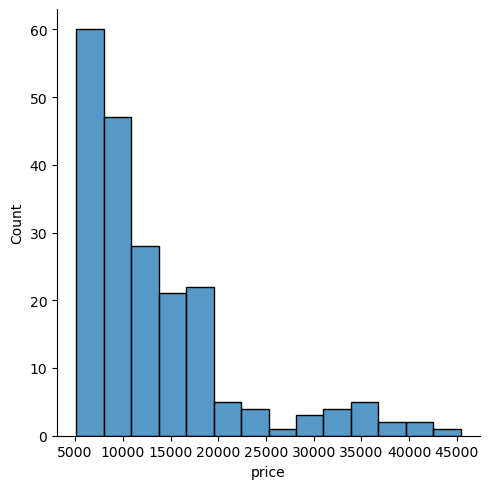

In [20]:
sns.displot(df['price'])

7)Correlation matrix

In [21]:
df=df.drop(['CarName'], axis=1)


In [22]:
df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [23]:
df["fueltype"]=df["fueltype"].map({"gas":0,"diesel":1}) 
df["aspiration"]=df["aspiration"].map({"std":0,"turbo":1})
df["doornumber"]=df["doornumber"].map({"two":0,"four":1})
df["carbody"]=df["carbody"].map({"sedan":0,"wagon":1,"hatchback":2,"convertible":3,"hardtop":4}) 
df["drivewheel"]=df["drivewheel"].map({"rwd":0,"fwd":1,"4wd":2})
df["enginelocation"]=df["enginelocation"].map({"front":0,"rear":1})
df["cylindernumber"]=df["cylindernumber"].map({"two":0,"three":1,"four":2,"five":3,"six":4,"eight":5,"twelve":6})
df["fuelsystem"]=df["fuelsystem"].map({"mpfi":0,"spfi":1,"1bbl":2,"2bbl":3,"4bbl":4,"idi":5,"spdi":6,"mfi":7})
df["enginetype"]=df["enginetype"].map({'dohc':0, 'ohcv':1, 'ohc':2, 'l':3, 'rotor':4, 'ohcf':5, 'dohcv':6})

In [1]:
df

NameError: name 'df' is not defined

<Axes: >

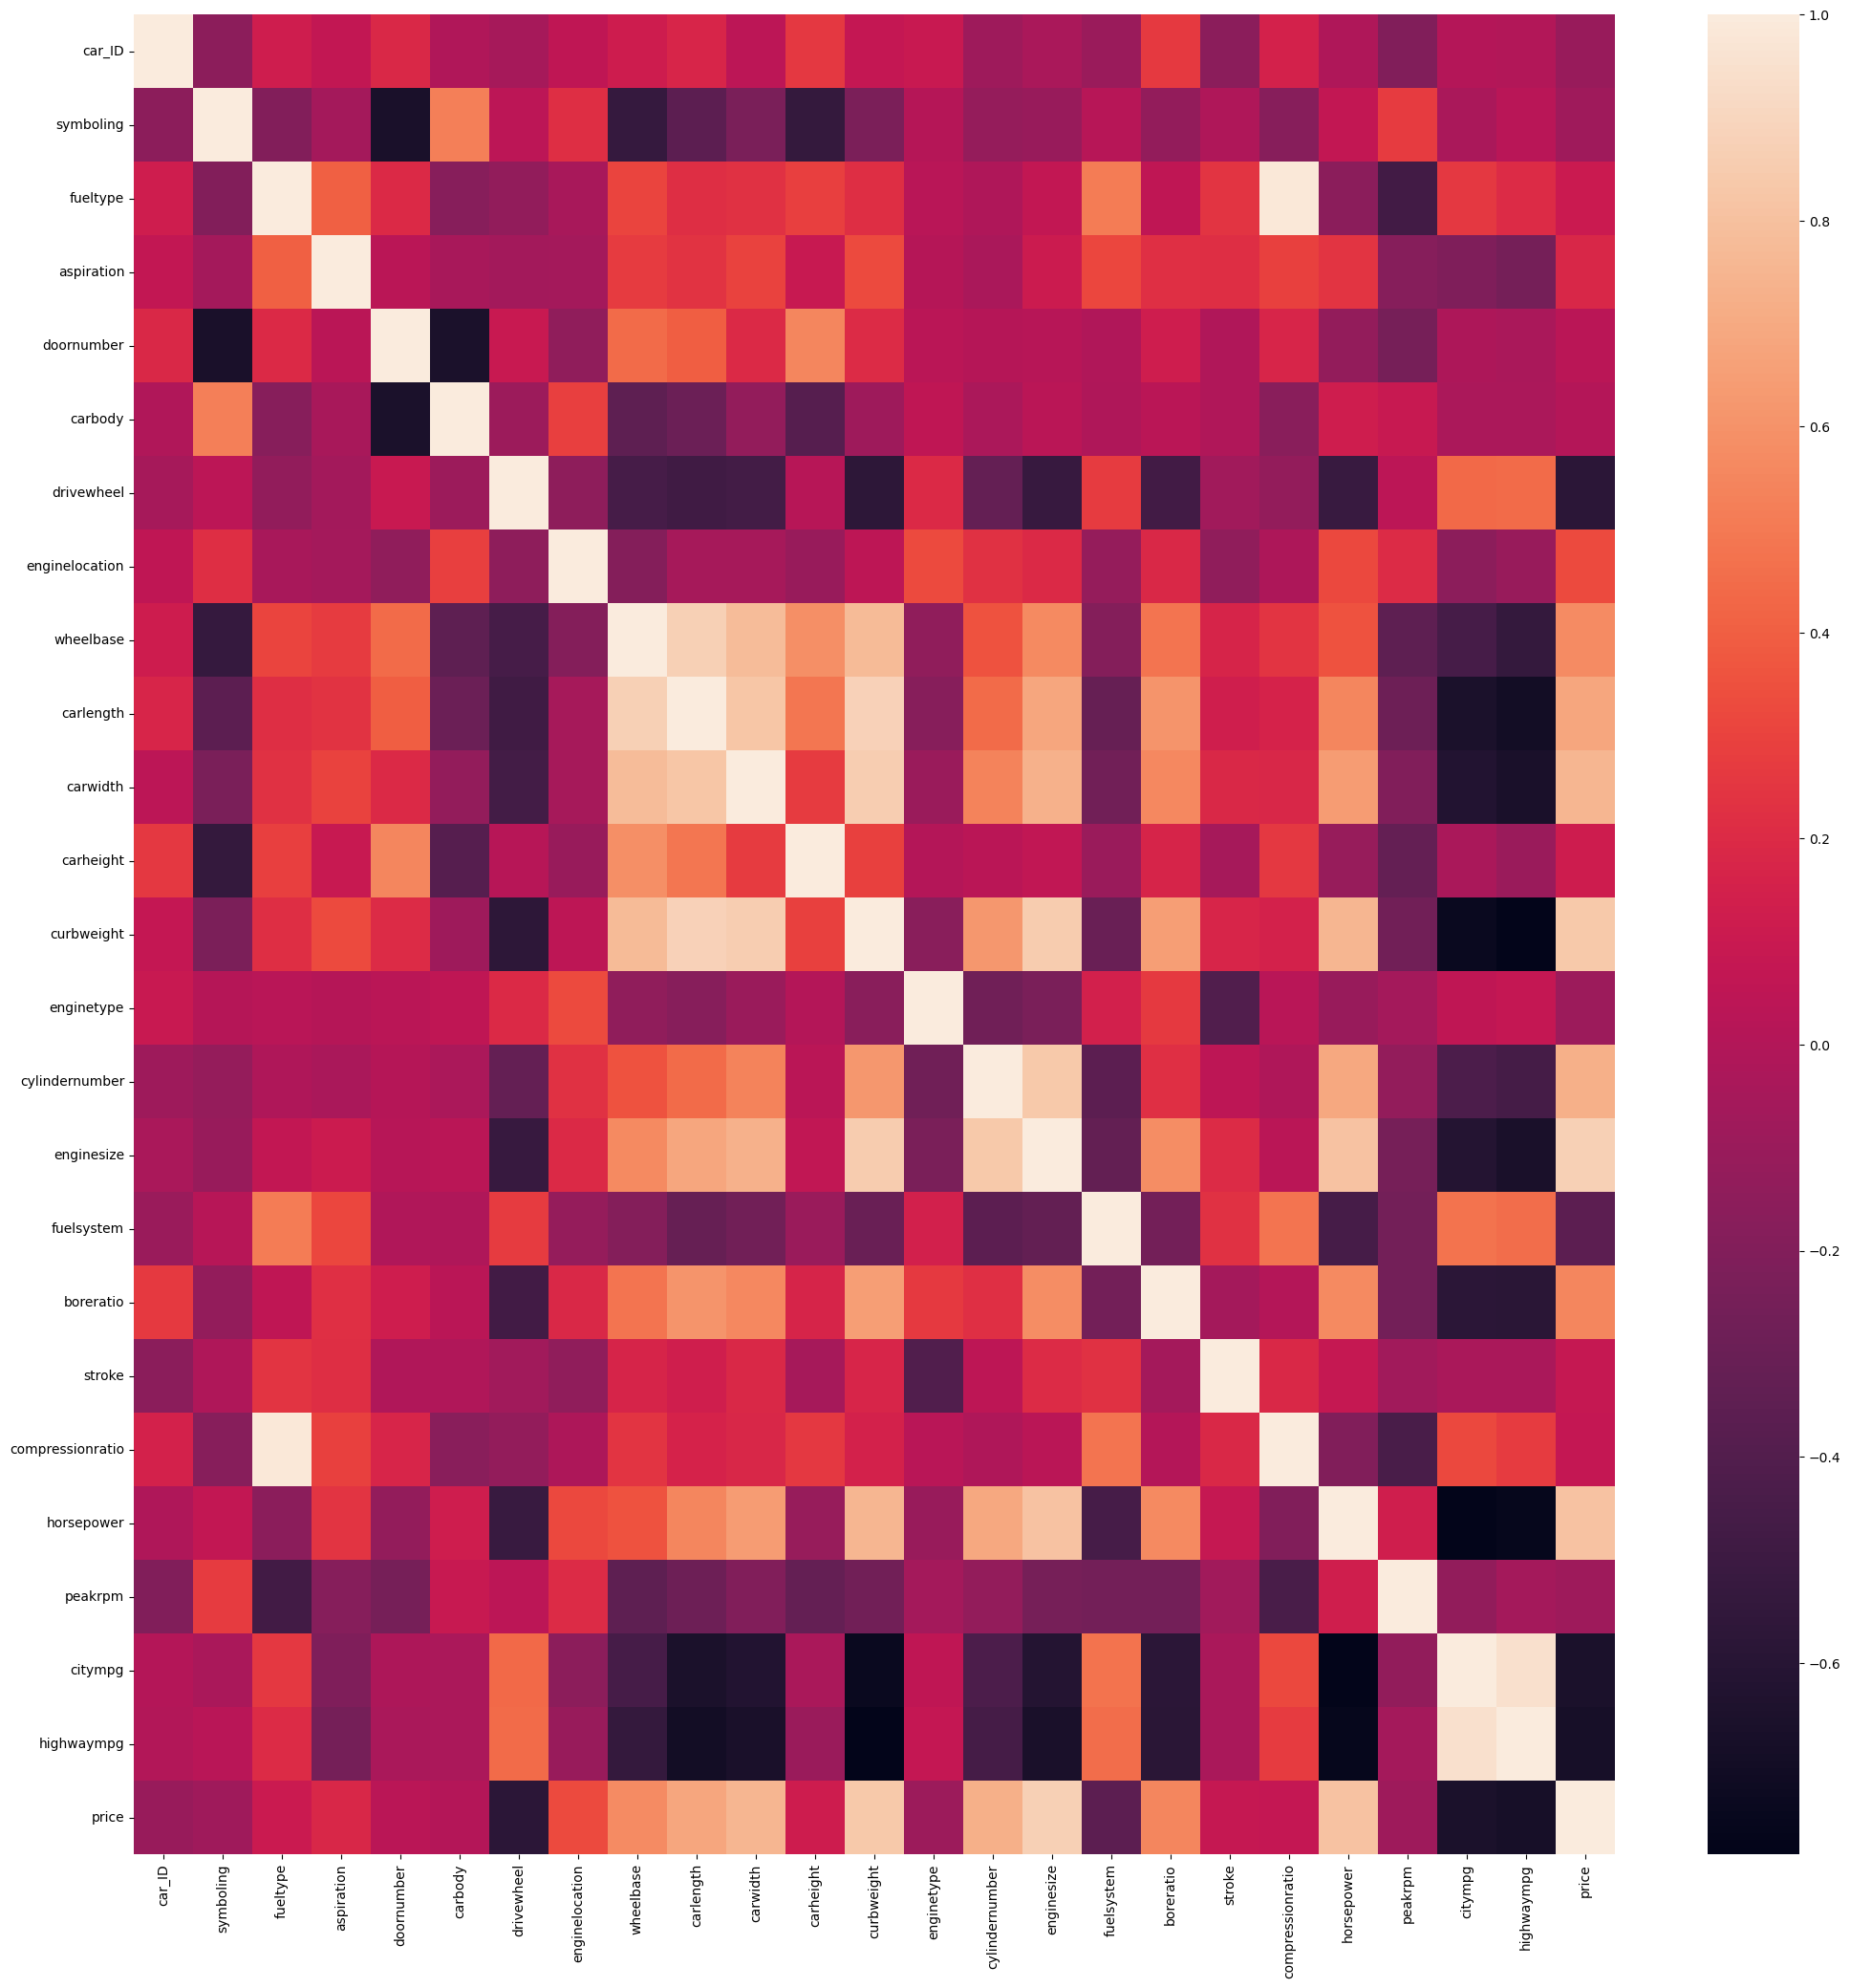

In [25]:
plt.figure(figsize=(25,25))
corr_matrix=df.corr()
sns.heatmap(corr_matrix)

<Axes: >

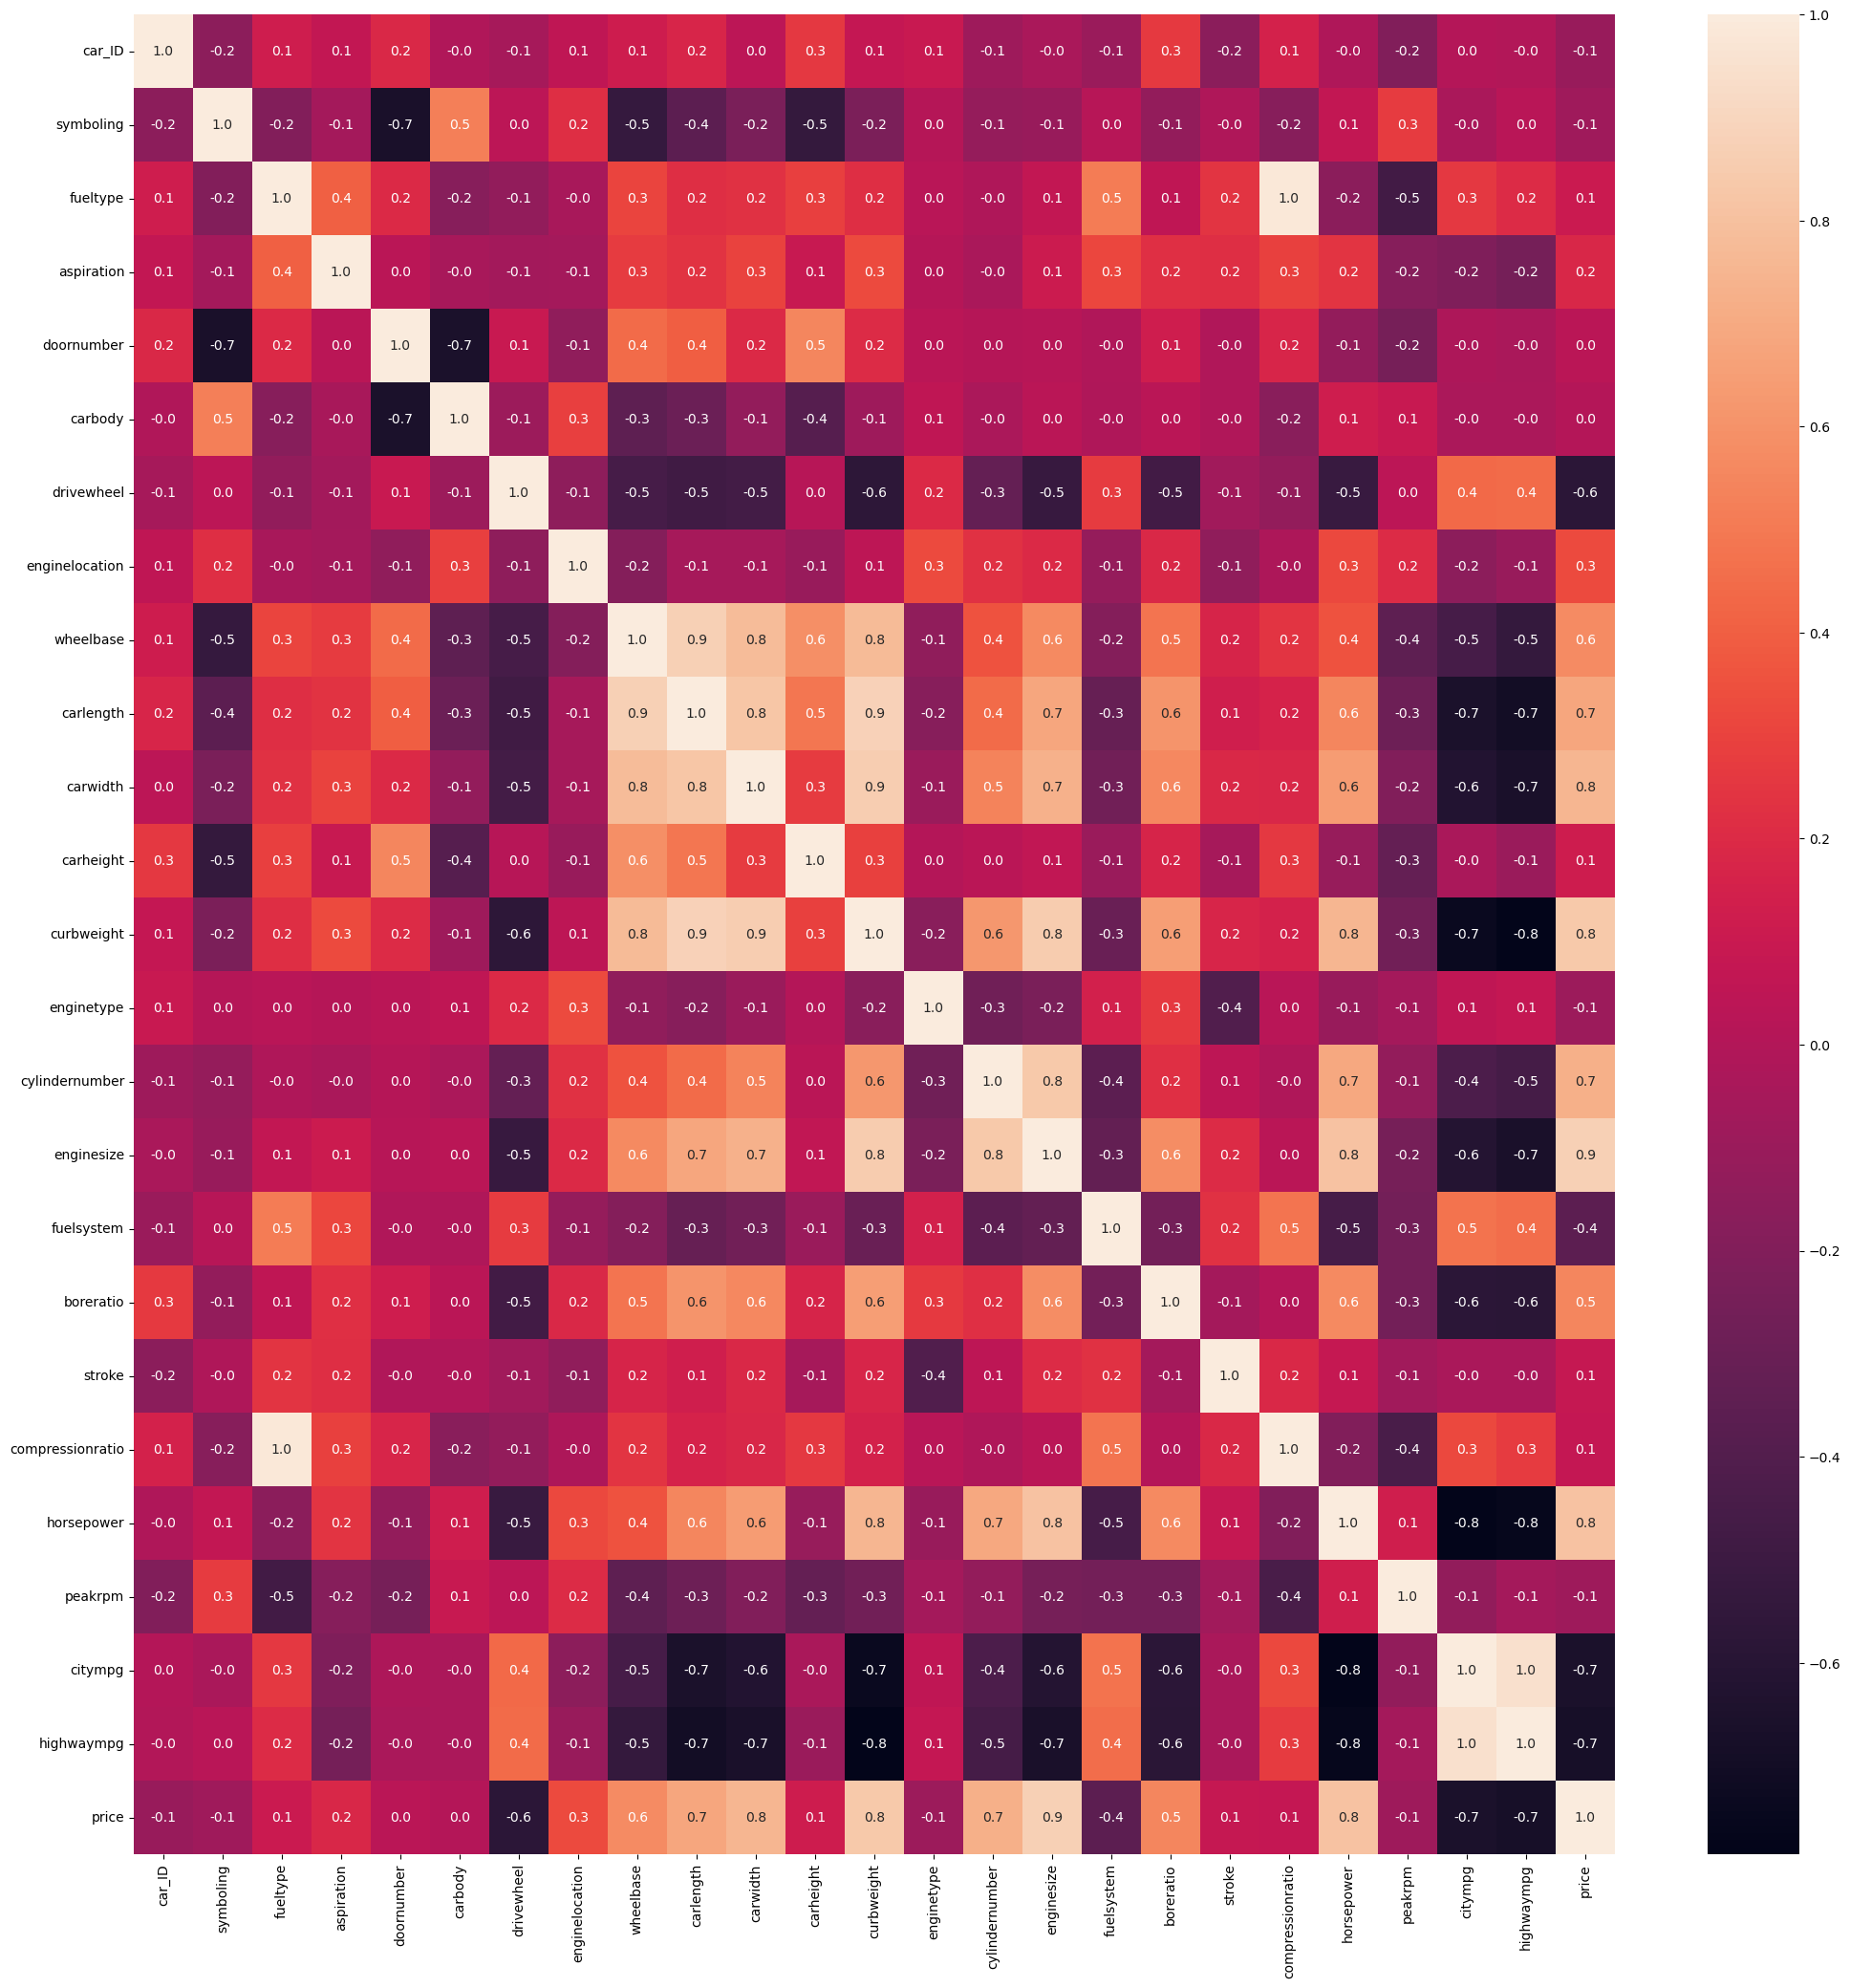

In [26]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix,annot=True,fmt=".1f")

In [27]:
x=df[["enginesize"]]
y=df[["price"]]
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.75)
x_train.shape
x_train

,enginesize
95,97
32,79
116,152
139,108
170,146
...,...
1,130
67,183
119,98
184,97


In [28]:
x_test.shape
x_test

,enginesize
28,122
115,120
202,173
124,156
144,108
140,108
4,136
114,152
109,120
72,234


In [29]:
y_train.shape
y_train

,price
95,7799.0
32,5399.0
116,17950.0
139,7053.0
170,11199.0
...,...
1,16500.0
67,25552.0
119,7957.0
184,7995.0


In [30]:
y_test.shape
y_test

,price
28,8921.000
115,16630.000
202,21485.000
124,12764.000
144,9233.000
140,7603.000
4,17450.000
114,17075.000
109,12440.000
72,35056.000


In [31]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [32]:
#Prediction
pre=reg.predict(x_test)
pre

array([[12300.41541769],
       [11967.05195407],
       [20801.18373992],
       [17967.59429918],
       [ 9966.87117237],
       [ 9966.87117237],
       [14633.95966301],
       [17300.86737195],
       [11967.05195407],
       [30968.76938024],
       [26801.72608503],
       [ 5299.78268173],
       [ 7299.96346344],
       [ 8300.05385429],
       [25801.63569418],
       [15467.36832205],
       [ 7299.96346344],
       [10300.23463599],
       [13633.86927216],
       [22134.63759439],
       [10466.9163678 ],
       [ 3632.96536365],
       [ 6966.59999982],
       [ 8300.05385429],
       [12300.41541769],
       [ 7299.96346344],
       [26801.72608503],
       [16300.77698109],
       [ 8133.37212248],
       [ 8300.05385429],
       [12300.41541769],
       [14633.95966301],
       [19301.04815365],
       [15300.68659024],
       [12300.41541769],
       [16300.77698109],
       [11967.05195407],
       [11967.05195407],
       [10300.23463599],
       [16300.77698109],


In [33]:
np.mean(abs(pre))

13338.970823573942

In [34]:
mean_squared_error(y_test,pre)

15083894.232883759

In [35]:
np.sqrt(mean_squared_error(y_test,pre))

3883.798943416582

In [36]:
mean_absolute_error(y_test,pre)

3000.2361210229724

In [37]:
r2_score(y_test,pre)

0.7294910211613786

<Axes: xlabel='enginesize', ylabel='price'>

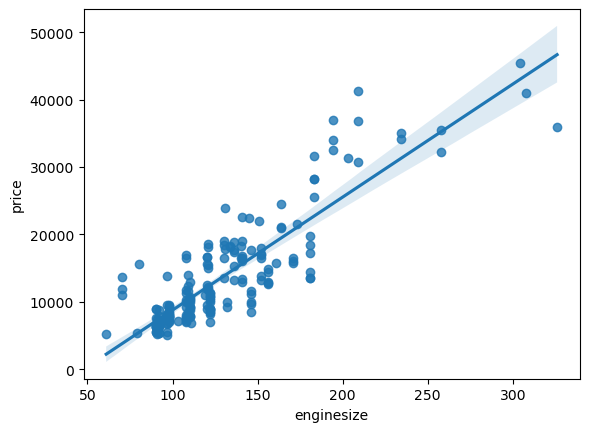

In [56]:
sns.regplot(data=df,x="enginesize",y="price")

In [40]:
import warnings

# Add this before your code
warnings.filterwarnings("ignore", category=UserWarning)


In [41]:
new_data = [[146]] # Input features for a new car
predicted_price = reg.predict(new_data)
print("Car of the Price is ",predicted_price)

Car of the Price is  [[16300.77698109]]


multivariet

In [42]:
x2=df.drop('price', axis=1) # axis=1 means column and axis=0 means row
y2=df[["price"]]
x_train2, x_test2, y_train2, y_test2=train_test_split(x2,y2,train_size=0.75)
x_train2.shape
x_train2

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
133,134,2,0,0,1,0,1,0,99.1000,186.6,...,2,121,0,3.54,3.07,9.30,110,5250,21.0,28.0
135,136,2,0,0,1,0,1,0,99.1000,186.6,...,2,121,0,3.54,3.07,9.30,110,5250,21.0,28.0
97,98,1,0,0,1,1,1,0,94.5000,170.2,...,2,97,3,3.15,3.29,9.40,69,5200,31.0,37.0
165,166,1,0,0,0,0,0,0,94.5000,168.7,...,2,98,0,3.24,3.08,9.40,112,6600,26.0,29.0
179,180,3,0,0,0,2,0,0,102.9000,183.5,...,4,171,0,3.27,3.35,9.30,161,5200,19.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,3,0,0,0,2,1,0,99.1000,186.6,...,2,121,0,3.54,3.07,9.31,110,5250,21.0,28.0
152,153,1,0,0,1,2,1,0,95.7000,158.7,...,2,92,3,3.05,3.03,9.00,62,4800,31.0,38.0
90,91,1,1,0,0,0,1,0,94.5000,165.3,...,2,103,5,2.99,3.47,21.90,55,4800,45.0,50.0
182,183,2,1,0,0,0,1,0,97.3000,171.7,...,2,97,5,3.01,3.40,23.00,52,4800,37.0,46.0


In [43]:
df.dtypes

car_ID                int64
symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg             float64
highwaympg          float64
price               float64
dtype: object

In [44]:
x_test2.shape
x_test2

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
39,40,0,0,0,1,0,1,0,98.8165,175.4,...,2,110,2,3.1500,3.580,9.0,86,5800,27.0,33.0
147,148,0,0,0,1,1,1,0,97.0000,173.5,...,2,108,0,3.6200,2.640,9.0,94,5200,25.0,31.0
44,45,1,0,0,0,0,1,0,94.5000,155.9,...,2,90,3,3.0300,3.110,9.6,70,5400,38.0,43.0
56,57,3,0,0,0,2,0,0,95.3000,169.0,...,0,70,4,3.3300,3.255,9.4,101,6000,17.0,23.0
204,205,-1,0,1,1,0,0,0,109.1000,188.8,...,2,141,0,3.7800,3.150,9.5,114,5400,19.0,25.0
93,94,1,0,0,1,1,1,0,94.5000,170.2,...,2,97,3,3.3301,3.290,9.4,69,5200,31.0,37.0
94,95,1,0,0,0,0,1,0,94.5000,165.3,...,2,97,3,3.1500,3.290,9.4,69,5200,31.0,37.0
163,164,1,0,0,0,0,0,0,94.5000,168.7,...,2,98,3,3.1900,3.030,9.0,70,4800,29.0,34.0
77,78,2,0,0,0,2,1,0,93.7000,157.3,...,2,92,3,2.9700,3.230,9.4,68,5500,31.0,38.0
203,204,-1,1,1,1,0,0,0,109.1000,188.8,...,4,145,5,3.0100,3.400,23.0,106,4800,26.0,27.0


In [45]:
y_train2.shape
y_train2

,price
133,12170.0
135,15510.0
97,7999.0
165,9298.0
179,15998.0
...,...
132,11850.0
152,6488.0
90,7099.0
182,7775.0


In [46]:
y_test2.shape
y_test2

,price
39,8845.0
147,10198.0
44,8916.5
56,11845.0
204,22625.0
93,7349.0
94,7299.0
163,8058.0
77,6189.0
203,22470.0


In [47]:
reg2 = LinearRegression()
reg2.fit(x_train2,y_train2) 

LinearRegression()

In [48]:
pred  = reg2.predict(x_test2)
pred

array([[10806.24865391],
       [11002.54891644],
       [ 7173.63480173],
       [ 8206.50610857],
       [16733.53665557],
       [ 5648.68087238],
       [ 6097.31713722],
       [ 6847.36815239],
       [ 6669.56140365],
       [16925.12649583],
       [ 5743.08313545],
       [21342.45583774],
       [18923.23393121],
       [ 4682.4479298 ],
       [19690.7860195 ],
       [ 6741.96787436],
       [10647.72570721],
       [ 8837.01197579],
       [10130.53492033],
       [ 8701.0149598 ],
       [10263.29192134],
       [16289.49993401],
       [ 8316.04474318],
       [39417.64266335],
       [19600.86869345],
       [25336.22231244],
       [ 2788.50242878],
       [ 9735.88585621],
       [35369.27323268],
       [ 4389.48062177],
       [ 6843.88823315],
       [18485.35207263],
       [18161.18886978],
       [20622.99173654],
       [ 8226.25884372],
       [14782.46723525],
       [14788.06067278],
       [ 7424.40309995],
       [ 5103.85135841],
       [10248.66245465],


In [49]:
np.mean(abs(pred))

13076.033842455829

In [50]:
mean_squared_error(y_test2,pred)

8070029.888915841

In [51]:
np.sqrt(mean_squared_error(y_test2,pred))

2840.7798029618275

In [52]:
mean_absolute_error(y_test2,pred)

2224.2790341055274

In [53]:
r2_score(y_test2,pred)

0.883241771486018

In [55]:
ninput = [[x2]]
out=reg2.predict(ninput)
out

ValueError: Found array with dim 4. LinearRegression expected <= 2.

In [89]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [90]:
sns.regplot(data=df,x=[['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']],y="price")

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 24 and the array at index 1 has size 205